<a href="https://colab.research.google.com/github/wereign/aera-vera-keras-nathu-geras/blob/main/RNN_SineWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

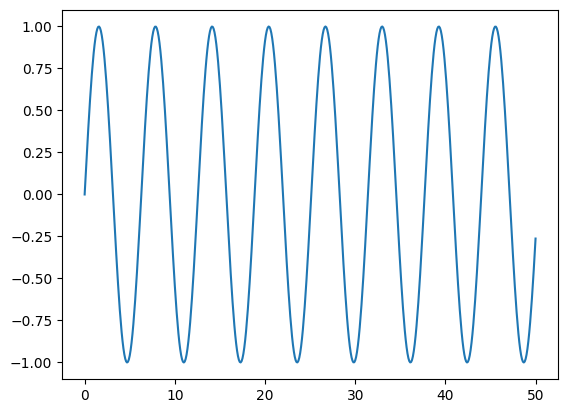

In [5]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [9]:
test_percent = 0.1 # 10 percent of the dataset will the test set

In [10]:
len(df) * test_percent

50.1

In [11]:
test_point = np.round(len(df) * test_percent)

In [12]:
test_point

50.0

In [13]:
test_index = int(len(df) - test_point)

In [14]:
train_set = df.iloc[:test_index]

In [16]:
test_set = df.iloc[test_index:]

Scaling the data
the label needs to be scaled too, since it's being fed into the network

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train_set)

MinMaxScaler()

In [20]:
scaled_train_set = scaler.transform(train_set)

In [21]:
scaled_test_set = scaler.transform(test_set)